<a href="https://colab.research.google.com/github/karinasaidene/DS_bootcamp_homework/blob/main/HOMEWORK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [63]:
mnist = tf.keras.datasets.mnist

class_names=['0','1','2','3','4','5','6','7','8','9']

(x_train , y_train), (x_test, y_test) = mnist.load_data()


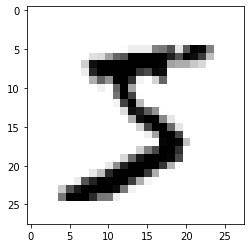

In [17]:
#visualisation
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [34]:
#create a model 



model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Flatten())
model.add( tf.keras.layers.Dense(128,kernel_initializer='he_normal', activation = tf.nn.sigmoid))
model.add( tf.keras.layers.Dense(128,kernel_initializer='he_normal', activation = tf.nn.sigmoid))
model.add( tf.keras.layers.Dense(128, kernel_initializer='he_normal',activation = tf.nn.sigmoid))
model.add( tf.keras.layers.Dense(128,kernel_initializer='he_normal', activation = tf.nn.sigmoid))
model.add( tf.keras.layers.Dense(128, kernel_initializer='he_normal',activation = tf.nn.sigmoid))
model.add( tf.keras.layers.Dense(128,kernel_initializer='he_normal', activation = tf.nn.sigmoid))

#optimizer = tf.keras.optimizers.SGD()
model.compile(optimizer='Adam', loss='SparseCategoricalCrossentropy', metrics = ['accuracy'])


In [35]:
history =  model.fit(x_train, y_train)

1875/1875 [==============================] - 8s 4ms/step - loss: 1.9380 - accuracy: 0.2620


In [36]:
#check the performance

print(model.summary())

score = model.evaluate(x_test, y_test, verbose =0)
print('test loss', score[0])
print('test top 1 accuracy', score[1])

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_19 (Flatten)        (32, 784)                 0         
                                                                 
 dense_114 (Dense)           (32, 128)                 100480    
                                                                 
 dense_115 (Dense)           (32, 128)                 16512     
                                                                 
 dense_116 (Dense)           (32, 128)                 16512     
                                                                 
 dense_117 (Dense)           (32, 128)                 16512     
                                                                 
 dense_118 (Dense)           (32, 128)                 16512     
                                                                 
 dense_119 (Dense)           (32, 128)               

In [89]:
#tensorboard
logs_dir = './tesnorflow_homework2_logs'

#define a call back method
from keras.callbacks import TensorBoard
callbacks = [TensorBoard(log_dir= logs_dir,
                         histogram_freq =1,
                         write_graph =True,
                         write_images = True,
                         update_freq = 'epoch',
                         profile_batch =2,
                         embeddings_freq =1 )]

In [90]:
import numpy as np
import pandas as pd
import datetime
import io
import seaborn as sns
file_writer = tf.summary.create_file_writer(logs_dir+'/cm'+datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

def log_confusion_matrix( epoch , logs) :
  #use the model to predict the values from the validation dataset
  test_pred =model(x_test)
  test_pred = tf.math.argmax(test_pred , axis =1)
  con_mat = tf.math.confusion_matrix(labels =y_test, predictions =test_pred).numpy()
  con_mat_norm = np.around(con_mat.astype('float')/con_mat.sum(axis=1)[: , np.newaxis], decimals=2)

  con_mat_df =pd.DataFrame (con_mat_norm, index =class_names , columns = class_names)
  figure = plt.figure(figsize=(8,8))
  sns.heatmap(con_mat_df, annot=True, cmap = plt.cm.Blues)
  plt.tight_layout()
  plt.ylabel('true label')
  plt.xlabel( 'predicted label')

  buf = io.BytesIO()
  plt.savefig(buf , format='png')

  plt.close(figure)
  buf.seek(0)
  image = tf.image.decode_png( buf.getvalue(),channels =4)
  image = tf.expand_dims(image , 0)

  #log the confusion matrix as an image summary
  with file_writer.as_default() :
    tf.summary.image("ConfusionMatrix", image , step=epoch)

TensorBoard_callback = tf.keras.callbacks.TensorBoard(log_dir =logs_dir)
cm_callback = tf.keras.callbacks.LambdaCallback(on_epoch_end = log_confusion_matrix)

In [93]:
#fit the model again using callback 
history =  model.fit(x_train , y_train , epochs =50, callbacks= [callbacks, cm_callback])

Epoch 1/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0379 - accuracy: 0.9880
Epoch 2/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0382 - accuracy: 0.9872
Epoch 3/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0388 - accuracy: 0.9869
Epoch 4/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0397 - accuracy: 0.9870
Epoch 5/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0360 - accuracy: 0.9874
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0372 - accuracy: 0.9871
Epoch 7/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0368 - accuracy: 0.9876
Epoch 8/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0335 - accuracy: 0.9886
Epoch 9/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0381 - accuracy: 0.9877
Epoch 10/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0

In [94]:
#add Tensorboard extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [95]:
!tensorboard --logdir ./tensorflow_homework2_logs --host localhost


2022-03-05 11:00:28.198409: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

TensorBoard 2.8.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C


# Nouvelle section

In [97]:
check_point= './tensorflow_homework2.cpkt'
model.save_weights (check_point)